V tej jupiter datoteki je narejena analiza podatkov, zbranih v datoteki 'zbrani_podatki.csv'.

Za začetek uvozimo potrebne datoteke:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re
import funkcije as fun
from funkcije import stack_graf

Najprej uvozimo podatke in jih predstavimo v obliki tabele. Zaradi težav pri klicanju zadnjih dveh stolpcev, ker njuno ime vsebuje dve besedi, tabelo preimenujemo, tako da so imena vseh stolpcev natanko ena beseda.

In [36]:
podatki = pd.read_csv('zbrani_podatki.csv', index_col='ID')
pd.options.display.max_rows = 40

dict = {'naslov': 'naslov','avtor' : 'avtor','mesec': 'mesec', 'glavno področje' : 'gl_pod', 'ostala področja' : 'os_pod'}
podatki.rename(columns = dict, inplace = True)
podatki.head(20)

,naslov,avtor,mesec,gl_pod,os_pod
ID,,,,,
1,Generalized conformal maps as classical symmet...,Edward B. Baker III,1,Mathematical Physics (math-ph),High Energy Physics - Theory (hep-th)
2,Duality family of KdV equation,"Xin Gu, Yuan-Yuan Liu, Wen-Du Li, Wu-Sheng Dai",1,Mathematical Physics (math-ph),Exactly Solvable and Integrable Systems (nlin.SI)
3,Guay&#39;s affine Yangians and non-rectangular...,Mamoru Ueda,1,Quantum Algebra (math.QA),empty
4,A Compact Introduction to Fractional Calculus,Alexander I. Zhmakin,1,History and Overview (math.HO),empty
5,Examples of left-orderable and non-left-ordera...,"Azer Akhmedov, Cody Martin",1,Group Theory (math.GR),Geometric Topology (math.GT)
6,A Global Optimization Algorithm for K-Center C...,"Jiayang Ren, Ningning You, Kaixun Hua, Chaojie...",1,Optimization and Control (math.OC),Machine Learning (cs.LG)
7,The Sticky L\&#39;evy Process as a solution to...,"Miriam Ramírez, Gerónimo Uribe Bravo",1,Probability (math.PR),Classical Analysis and ODEs (math.CA)
8,Learning Koopman eigenfunctions of stochastic ...,"Alexander Sikorski, Enric Ribera Borrell, Marc...",1,Dynamical Systems (math.DS),Probability (math.PR)
9,A stabilized local integral method using RBFs ...,"L. Ponzellini Marinelli, L. Raviola",1,Numerical Analysis (math.NA),Computational Physics (physics.comp-ph)


Najprej predstavimo število člankov objavlenih v posameznem mescu. Vidimo upad poleti, pozimi ter tudi aprila. Na podlagi lahko sklepamo, da slabo vreme negativno vpliva na produktivnost matematikov.

<Axes: title={'center': 'Število člankov glede na mesec'}, xlabel='mesec'>

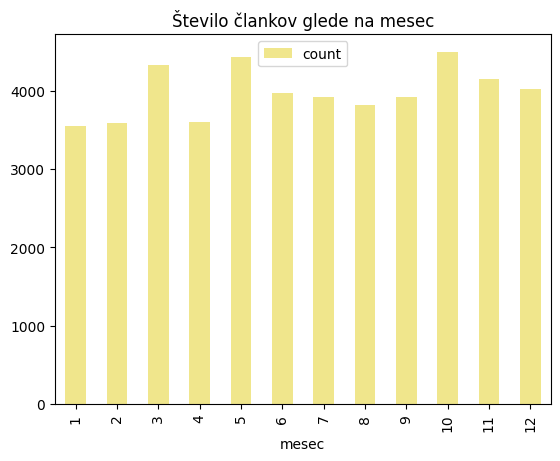

In [37]:
#graf števila člankov glede na mesec

vsi = podatki.value_counts('mesec').reset_index().sort_values(by = 'mesec', ascending=True).set_index('mesec').reset_index()
vsi.plot(x='mesec', y='count', kind='bar', title='Število člankov glede na mesec', color = 'khaki')

Naslednja tabela poišče, koliko člankov je vsak avtor koavtoriral (slovenska sopomenka za glagol "coauthor"?) in nato prešteje število avtorjev, ki so koavtorirali n člankov v odvisnosti od n.
Nek avtor je napisal 49 člankov, kar je skoraj 1 članek na teden, medtem ko je večina avtorjev napisala le enega ali dva. Ker število avtorjev strmo upada v odvisnosti od n, bomo tabelo razdelili na dva dela, saj je težko prikazati začetna tromestna števila na isti skali, kot končne podatke, ki variirajo med 1, 2 in 0.

<Axes: title={'center': 'Število avtorjev v odvisnosti od števila njegovih področij 1'}, xlabel='count'>

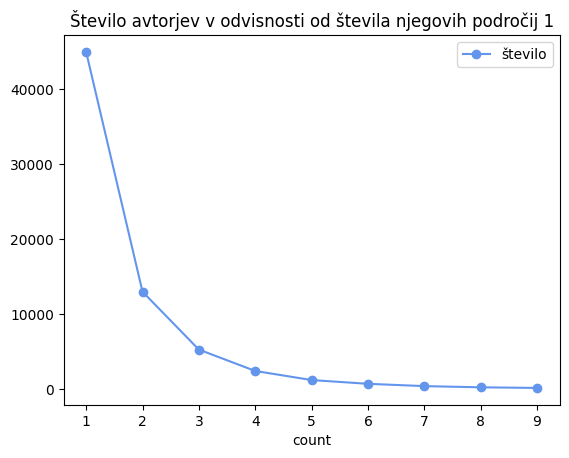

In [38]:
#graf ki prikaže število posameznih avtorjev v odvisnosti od tega kolikokrat se pojavijo
avtorji = podatki['avtor'].str.split(', ', expand=True).stack().value_counts().reset_index()
avtorji = pd.DataFrame(avtorji.value_counts('count'))  
avtorji.rename(columns = {'count' : 'število'}, inplace = True)
avtorji = avtorji.sort_index().reset_index()  #to nam vrne seznam števila avtorjev v odvisnosti od pojavitve, resetiramo index da lahko poimenujemo stolpca po svoji volji

avtorji.head(9).plot(x='count', y='število', kind='line', marker='o', title='Število avtorjev v odvisnosti od števila njegovih področij 1', color = 'cornflowerblue')

<Axes: title={'center': 'Število avtorjev v odvisnosti od števila njegovih področij 2'}, xlabel='count'>

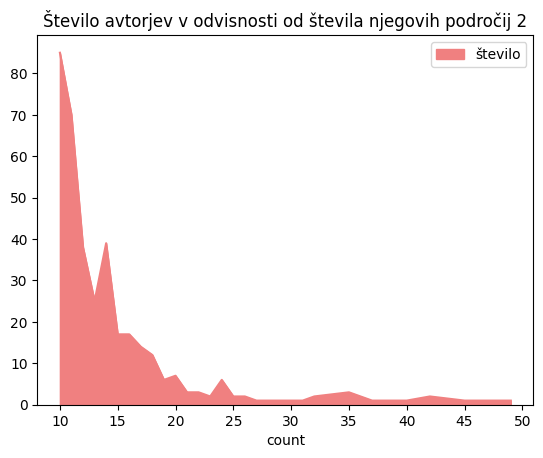

In [39]:
avtorji.tail(-9).plot(x='count', y='število', kind='area', title='Število avtorjev v odvisnosti od števila njegovih področij 2', color = 'lightcoral')

Kot pričakovano, število avtorjev strmo upada, dokler ne postane dovolj nizko, da zaradi majhnega vzorca postane manj predvidljivo in bolj alternirajoče, vendar je trend updanja še vedno viden. Če bi to analizo podatkov delali za več let, bi bil trend verjetno močneje izražen. 

Naslednja dva grafa se osredotočata zgolj na članke, katerih glavno področje je teorija grup. Prvi graf prikazuje koliko teh člankov je bilo objavljenih v posameznem mesecu, tako kot graf na samem začetku datoteke, le da tokrat omejeno zgolj na članke iz področja teorije grup. Vidimo, da imata le-ta grafa podobno obliko, kar pomeni, da imajo teoristi grup podobne navade kot ostali matematiki. Nato k tem člankom prištejemo še članke, ki imajo teorijo grup za stransko področje in znova ne opazimo deviacij od do zdaj videnih trendov objavljanja.

<Axes: xlabel='mesec'>

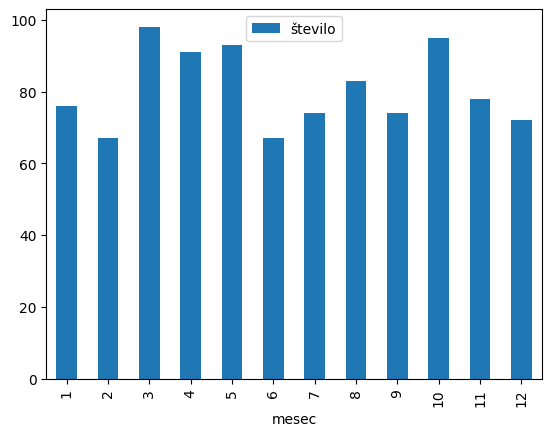

In [40]:
#število člankov z glavnim področjem Group Theory glede na mesec

gtgm = podatki[podatki.gl_pod == 'Group Theory (math.GR)'].value_counts('mesec').reset_index()
gtgm = gtgm.sort_values(by = 'mesec', ascending=True).set_index('mesec')
gtgm.rename(columns = {'count' : 'število'}, inplace = True)

gtgm.plot.bar()

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Število vseh člankov o teoriji grup'}, xlabel='Mesec', ylabel='Število člankov'>)

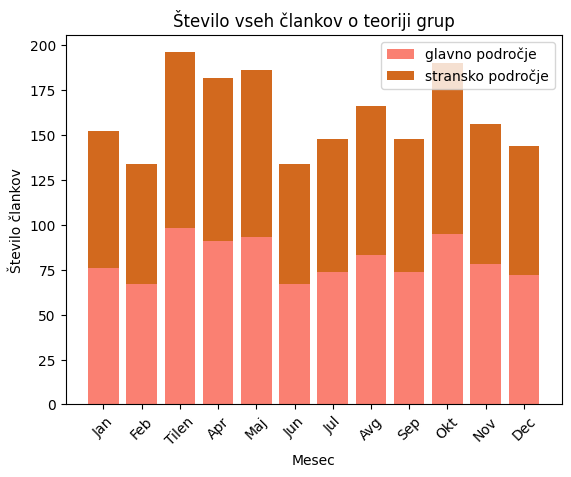

In [41]:
#število vseh člankov o teoriji grup glede na mesec

gtgm.rename(columns = {'število' : 'glavno področje'}, inplace = True)
gtsp = podatki[podatki.os_pod.str.contains('Group Theory', case=False, na=False)].value_counts('mesec').reset_index()
gtsp = gtsp.sort_values(by = 'mesec', ascending=True).set_index('mesec')
gtsp.rename(columns = {'count' : 'stransko področje'}, inplace = True)




combined_gt = pd.concat([gtgm, gtsp], axis=1) #to nam da kombinirano razpredelnico števila vseh člankov ki na kakršenkoli način vsebujejo group theory

mesci = ['Jan', 'Feb', 'Tilen', 'Apr', 'Maj', 'Jun', 'Jul', 'Avg', 'Sep', 'Okt', 'Nov', 'Dec']
stack_graf(combined_gt, mesci, 'Mesec', 'Število člankov', 'Število vseh člankov o teoriji grup') #funkcija ki sestavi graf, kjer so podatki iz obeh stolpcev razpredelnice drug na drugem




Naslednji graf predstavlja število del na posameznem področju. Zaradi lažje preglednosti uprizorimo le 20 področij z največ članki. V originalni tabeli imajo imena področij na koncu v oklepaju zapisano kratico, ki jo spletna stran uporablja, npr. "Algebraic Topology (math.AT)". Te nam kot bralcem zgolj bodejo v oči, zato jih tudi odstranimo.

[Text(0, 0, 'Analysis of PDEs'),
 Text(1, 0, 'Combinatorics'),
 Text(2, 0, 'Optimization and Control'),
 Text(3, 0, 'Numerical Analysis'),
 Text(4, 0, 'Probability'),
 Text(5, 0, 'Information Theory'),
 Text(6, 0, 'Number Theory'),
 Text(7, 0, 'Algebraic Geometry'),
 Text(8, 0, 'Differential Geometry'),
 Text(9, 0, 'Dynamical Systems'),
 Text(10, 0, 'Machine Learning'),
 Text(11, 0, 'Functional Analysis'),
 Text(12, 0, 'Mathematical Physics'),
 Text(13, 0, 'Group Theory'),
 Text(14, 0, 'Statistics Theory'),
 Text(15, 0, 'Representation Theory'),
 Text(16, 0, 'Geometric Topology'),
 Text(17, 0, 'Classical Analysis and ODEs'),
 Text(18, 0, 'Quantum Physics'),
 Text(19, 0, 'Logic')]

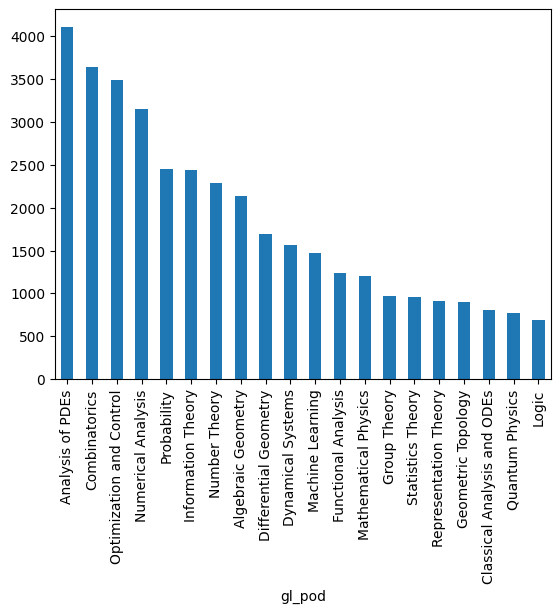

In [42]:
graf = podatki['gl_pod'].value_counts().head(20)
seznam = pd.DataFrame(graf)
seznam = seznam.index.tolist()
nov_seznam = [re.sub(r"\[.*?\]| \(.*?\)|\{.*?\}", "", s) for s in seznam]

graf.plot.bar().set_xticklabels(nov_seznam)

Kratice na koncu imena področja, bi lahko odstranili že v pythonu. Razlog da jih nismo, je da se v njih skriva podatek h kateremu "nadpodročju" področje pripada. Na primer (math.AT) in (math.GR) oba spadata pod "math", (cs.IT) pa ne. V naslednjem tortnem diagramu se bomo poslužili natanko teh podatkov ter prikazali razporeditev količine člankov znotraj teh kategorij. Na žalost imena fizikalnih področij: (nucl-th), (cond-mat), (nlin) etc. nimajo nekega skupnega imenovalca, zato jih moramo kombinirati ročno.

([<matplotlib.patches.Wedge at 0x229daf17c50>,
 [Text(-0.8046350422893874, 0.7500416313245258, 'math'),
  Text(0.4546700147721677, -1.0016362501762188, 'cs'),
  Text(0.9556100107201109, -0.5448022645065913, 'physics'),
  Text(1.0785903542417068, -0.2159695528002728, 'stat'),
  Text(1.0945160733526733, -0.10970216576096062, 'eess'),
  Text(1.099627010702043, -0.028643277300083154, 'ostalo')])

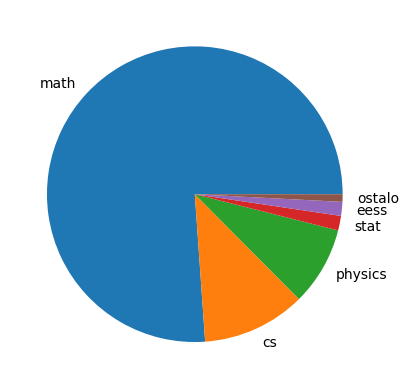

In [43]:
#število člankov na posameznem nadpodročjem

podatki['x'] = podatki['gl_pod'].str.extract(r'\(\s*(.+?)\s*[.)]')
an = podatki['x'].value_counts().reset_index()

#seštejemo vsa fizikalna področja
fizika = ['cond-mat', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-th', 'nlin', 'nucl-ex', 'nucl-th', 'physics']
kriterij = an['x'].isin(fizika) | an['x'].str.endswith('-ph')
fizika_an = an[kriterij].groupby('x', as_index=False)['count'].sum()
ne_fizika_an = an[~kriterij]
fizika_st = sum(fizika_an['count'].tolist())
fizika_nova = pd.DataFrame({'x' : ['physics'], 'count' : [fizika_st]})

tortna_tabela = pd.concat([ne_fizika_an, fizika_nova], ignore_index=True).sort_values('count', ascending=False) #nova tabela kjer je fizika eno področje

nad_500 = tortna_tabela[tortna_tabela['count'] >= 500]
drugo = tortna_tabela[tortna_tabela['count'] < 500].sum()['count']
ostalo = pd.DataFrame({'x' : 'ostalo', 'count': [drugo]})

tortna_tabela = pd.concat([nad_500, ostalo], ignore_index=True) #področje z manj kot 500 vnosi seštejemo v eno, saj drugače ne bi bila vidna na grafu

tortna_tabela


plt.pie(tortna_tabela['count'], labels=tortna_tabela['x'])

Vsak članek se nanaša na eno ali več področij, sledeča tabela prikazuje na koliko področij se nanaša koliko člankov. Vidimo, da se rahla večina nanaša na vsaj dve področji, nek članek pa združuje celo osem področij. To tabelo prikažemo z razsevnim diagramom, vendar jih zaradi velike variacije podatkov spet težko spravimo na eno skalo.

,Število področij,Število člankov
0,1,22754
1,2,15579
2,3,6388
3,4,2151
4,5,764
5,6,104
6,7,30
7,8,1


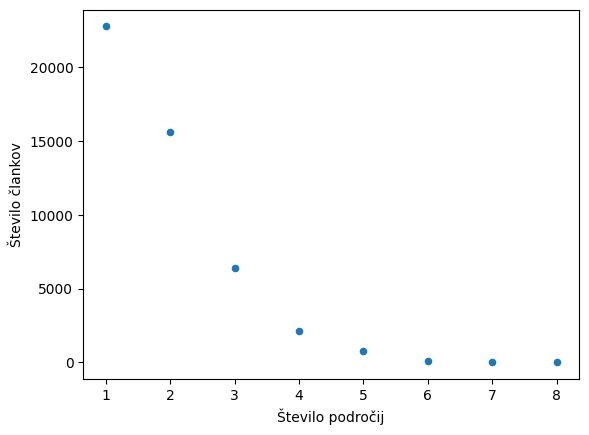

In [44]:
#tabela ki nam pove, koliko člankov se nanaša na koliko področij

podatki['os_pod'].str.split(',').str.len()

podatki['st_podrocij'] = podatki['os_pod'].apply(lambda x: 1 if x == 'empty' else len(x.split(',')) + 1)

tabela_st_podrocij = podatki['st_podrocij'].value_counts().reset_index()

tabela_st_podrocij.rename(columns = {'st_podrocij' : 'Število področij', 'count' : 'Število člankov'}, inplace = True)

tabela_st_podrocij.plot(x='Število področij', y='Število člankov', kind='scatter')

tabela_st_podrocij

Posamezen članek se lahko nanaša na več področij, vendar je posamezen avtor lahko aktiven na še večih področjih. V naslednji tabeli je prikazano h kolikim področjem je prispevalo koliko avtorjev, pri tem pa pazimo, da posameznega področja ne štejemo večkrat.

In [45]:
pod = podatki.set_index('avtor')
pod = pod.apply(lambda row: row['gl_pod'] if row['os_pod'] == 'empty' else row['gl_pod'] + ', ' + row['os_pod'], axis=1)
#ta tabela je zdaj tabela avtorjev in glavnih ter stranskih področij

pod = pod.reset_index()
pod['avtor'] = pod['avtor'].str.split(',') 
pod = pod.explode('avtor')
pod = pod.sort_values(by='avtor', ascending=True)
pod = pod.dropna(subset=['avtor'])
pod.columns = ['avtor', 'področja']
pod['področja'] = pod['področja'].str.split(',')
pod = pod.groupby('avtor', as_index=False).agg({'področja': lambda x: list(set(sum(x, [])))})  #tabela unikatnih avtorjev ter število unikatnih področij h katerim so pripomogli

pod['področja'] = pod['področja'].apply(len)

pod = pod['področja'].value_counts() #tabela (oz list) avtorjev ki pripomorejo k n področjem v odvisnoti od n

pod = pod.reset_index()

pod.columns = ['število področij h katerim je avtor pripomogel', 'število avtorjev']

pod

,število področij h katerim je avtor pripomogel,število avtorjev
0,1,28849
1,2,23198
2,3,11998
3,4,6292
4,5,3271
5,6,1449
6,7,867
7,8,417
8,9,228
9,10,144


Ta tabela ima znova strm padec. Začetne vrednosti se razlikujejo za več tisoč, zadnjih osem vrednosti pa ima zgolj eno števko, zato je potrebujemo način, da lahko grafično uprizorimo tudi take tabele. To dosžemo z uporabo logaritmične skale na y osi. V posebej python datoteki, definiramo funkcijo, ki sprejme tabelo in nam vrne zaželjen graf, ter jo uporabimo na prejšnih dveh tabelah.

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Koliko avtorjev je pripomoglo h koliko področjem?'}, xlabel='Število avtorjev', ylabel='Število področij h katerim je avtor pripomogel'>)

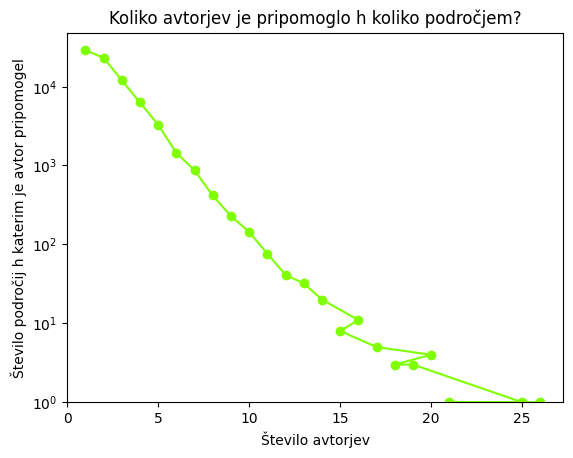

In [46]:
fun.log_line(pod, 'Število avtorjev', 'Število področij h katerim je avtor pripomogel', 'Koliko avtorjev je pripomoglo h koliko področjem?')

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Število člankov glede na to na koliko področij se nanašajo'}, xlabel='Število področij', ylabel='Število člankov'>)

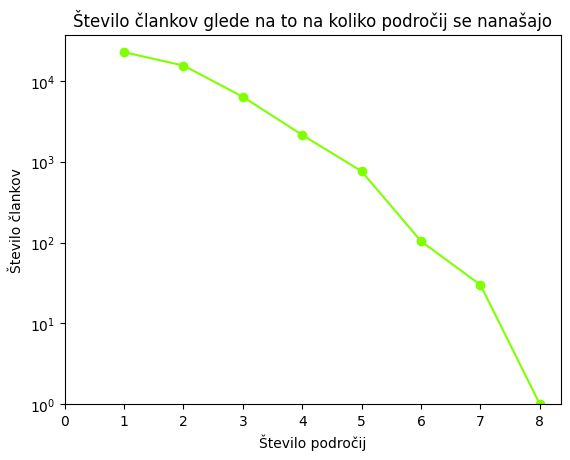

In [47]:
fun.log_line(tabela_st_podrocij, "Število področij", "Število člankov", "Število člankov glede na to na koliko področij se nanašajo")

Ti tabeli sta bolje razvidni, na prvi je celo vidno, da je graf za dovolj velike vrednosti, kjer je merska napaka majhna, skoraj linearen.

Na konec postavimo tabelo, ki za vsako področje, ki se kot glavno področje pojavi več kot 500-krat poda število pojavitev in procent solo pojavitev, kjer je solo pojavitev definirana kot vsak članek na zaželenem področju, ki nima nobenega stranskega področja.

In [48]:
#katero področje se najpogosteje pojavi samo (torej brez stranskih področij)

tab2 = podatki['gl_pod'].value_counts().reset_index()
tab2 = tab2[tab2['count'] > 500]
#to je tabela  področij ki se pojavijo več kot 500 krat (hočemo dovolj velik sample size)
seznam_pogostih_predmetov = tab2['gl_pod'].tolist()

tab3 = podatki[podatki.os_pod == 'empty']
tab3 = tab3[tab3['gl_pod'].apply(lambda x: x in seznam_pogostih_predmetov)]
tab3 = tab3['gl_pod'].value_counts().reset_index()
#tabela istih področij takrat ko nimajo stranskega področja

seznam_predmetov_tab3 = tab3['gl_pod'].tolist()
tab2 = tab2[tab2['gl_pod'].apply(lambda x: x in seznam_predmetov_tab3)].reset_index().drop(columns=['index'])
#poskrbimo da imata tabeli enake vnose

tab4 = tab3
tab4['count'] = tab3['count'] / tab2['count']
tab4 = tab4.sort_values(by = 'count', ascending=False).reset_index().drop(columns=['index']) #to ustvari tabelo z zaželjeno vrednostjo glede na področje
 
tab5 = pd.merge(tab2, tab4, on='gl_pod')
tab5.columns = ['področje', 'št_člankov', 'procent[%]']
tab5['procent[%]'] = (tab5['procent[%]'] * 100).round(0).astype(int) #združimo tabeli da vsebuje in procent in število člankov, jo preimenujemo ter decimalko spremenimo v procent
tab5

,področje,št_člankov,procent[%]
0,Analysis of PDEs (math.AP),4107,69
1,Combinatorics (math.CO),3645,63
2,Optimization and Control (math.OC),3484,60
3,Numerical Analysis (math.NA),3152,62
4,Probability (math.PR),2452,54
5,Information Theory (cs.IT),2438,56
6,Number Theory (math.NT),2292,63
7,Algebraic Geometry (math.AG),2140,51
8,Differential Geometry (math.DG),1695,45
9,Dynamical Systems (math.DS),1566,54


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Procent v odvisnosti od števila člankov'}, xlabel='število člankov', ylabel='procent [%]'>)

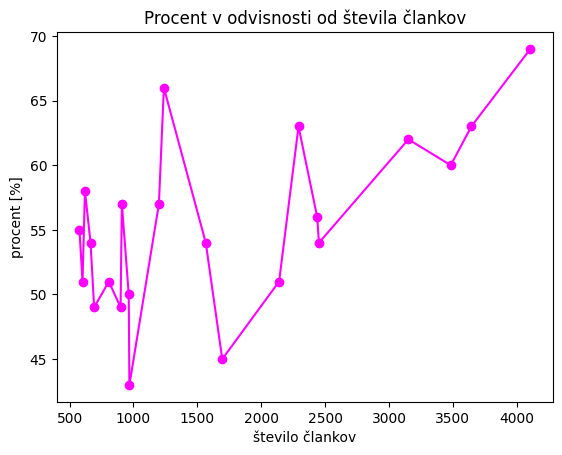

In [49]:
fun.line_with_points(tab5, 'število člankov', "procent [%]", "Procent v odvisnosti od števila člankov")